In [4]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## load some singnal and foreground
sig, sighead = fitsio.read("../sims/HImesh_0512_z100.fits",header=True)
Tb = sighead['TBAR']
Dpix = sighead['LBOX']/sighead['NAXIS2']
xc = Dpix*np.arange(sighead['NAXIS2'])
fg, fghead = fitsio.read("../sims/Sky_0512_z100_060.0-30.0.fits",header=True)
## reformat in a nice way
sig = Tb*np.array([sig[i][0] for i in range(512)])
fg = np.array([fg[i][0] for i in range(512)])


Text(0, 0.5, 'T [K]')

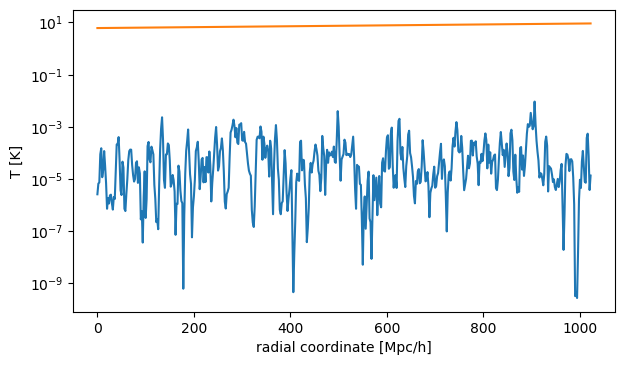

In [7]:
## A depressing plot, please kill me
plt.figure(figsize=(7,4),dpi=100)
plt.plot(xc,sig[300,300,:])
plt.plot(xc,fg[300,300,:])
plt.semilogy()
plt.xlabel('radial coordinate [Mpc/h]')
plt.ylabel('T [K]')

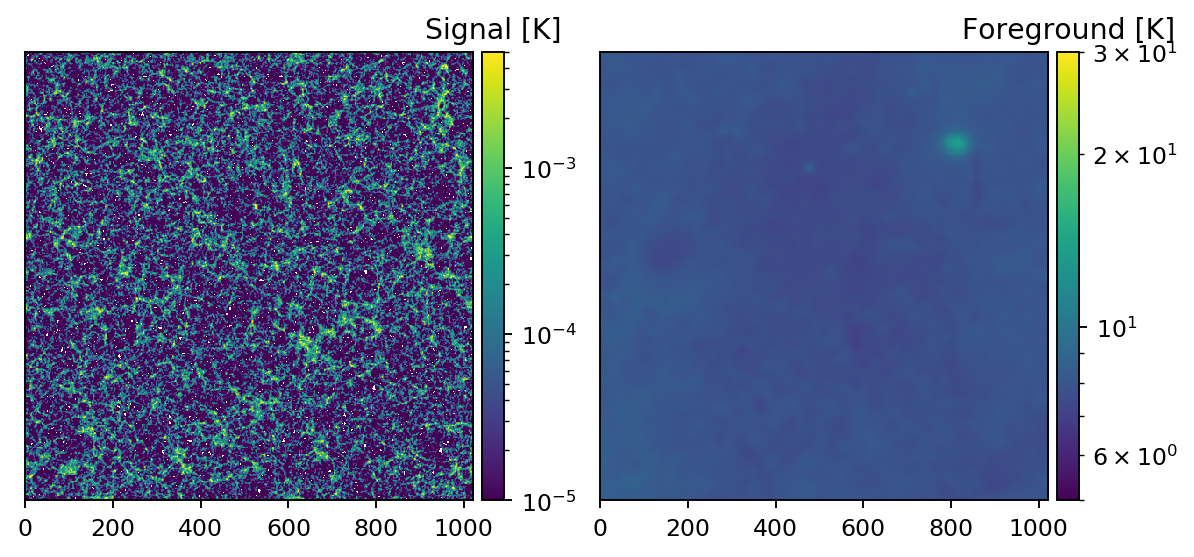

In [8]:
## Two slices
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(figsize=(8,8),dpi=170)
for i,toplot,vmin,vmax,name in [(1,sig,1e-5,5e-3,'Signal [K]'),
                                (2,fg,5,30,'Foreground [K]')]:
    plt.subplot(1,2,i)
    ax = plt.gca()
    plt.imshow(toplot[:,:,300],extent=[xc[0],xc[-1],xc[0],xc[-1]],norm=LogNorm(vmin,vmax))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax)
    ax.get_yaxis().set_visible(False)
    plt.title(name)


In [9]:
sighead


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =              1048576 / length of dimension 1
NAXIS2  =                  512 / length of dimension 2
PCOUNT  =                    0 / number of group parameters
GCOUNT  =                    1 / number of groups
TFIELDS =                    1 / number of table fields
TTYPE1  = 'HI      '
TFORM1  = '262144E '
TDIM1   = '(512,512)'
OMEGAM  =             0.309167
OMEGAB  =              0.04903
HUBBLE  =                 67.7
SIGMA8  =               0.8222
ENN_S   =              0.96824
TBAR    = 0.000143102321074746
LBOX    =               1024.0
REDSHIFT=                  1.0
MODEL   = 'C       '
SIM     = 'HV10240-R'
JRNLREF = 'Modi+19 JCAP 09.024.2019'
ARXIV   = '1904.11923'
COMMENT HI rho/rhobar field from HiddenValley
COMMENT Length units are Mpc/h
COMMENT Tbar in K from Rhee+18

In [10]:
fghead


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =              1048576 / length of dimension 1
NAXIS2  =                  512 / length of dimension 2
PCOUNT  =                    0 / number of group parameters
GCOUNT  =                    1 / number of groups
TFIELDS =                    1 / number of table fields
TTYPE1  = 'SKY     '
TFORM1  = '262144E '
TDIM1   = '(512,512)'
LBOX    =               1024.0
REDSHIFT=                  1.0
COMMENT Foreground sky, T_RJ units
COMMENT Length units are Mpc/h

In [11]:
fghead['TTYPE1']

'SKY     '